In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# load dataset
df = pd.read_csv('/Users/urvashibalasubramaniam/Documents/GitHub/Kabir_Vohra_Urvashi_Balasubraniam_A1/retail_task/src/Retail.csv')

# Understanding the Dataset
(1) categories
(2) statistics
(3) correlation checks prior to encoding (just numerical features)

In [20]:
# categories
df.columns

Index(['age', 'gender', 'income_bracket', 'loyalty_program',
       'membership_years', 'churned', 'marital_status', 'number_of_children',
       'education_level', 'occupation', 'transaction_id', 'transaction_date',
       'product_id', 'product_category', 'quantity', 'unit_price',
       'discount_applied', 'payment_method', 'store_location',
       'transaction_hour', 'day_of_week', 'week_of_year', 'month_of_year',
       'avg_purchase_value', 'purchase_frequency', 'last_purchase_date',
       'avg_discount_used', 'preferred_store', 'online_purchases',
       'in_store_purchases', 'avg_items_per_transaction',
       'avg_transaction_value', 'total_returned_items', 'total_returned_value',
       'total_sales', 'total_transactions', 'total_items_purchased',
       'total_discounts_received', 'avg_spent_per_category',
       'max_single_purchase_value', 'min_single_purchase_value',
       'product_name', 'product_brand', 'product_rating',
       'product_review_count', 'product_stock',

In [21]:
# describe in common statistical terms
df.describe()

,age,membership_years,number_of_children,transaction_id,product_id,quantity,unit_price,discount_applied,transaction_hour,week_of_year,...,product_return_rate,product_weight,product_shelf_life,promotion_id,customer_zip_code,store_zip_code,distance_to_store,customer_support_calls,website_visits,days_since_last_purchase
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,...,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,48.489880,4.498445,1.999791,499796.925741,4999.302701,5.003425,500.120805,0.250013,11.508469,26.501809,...,0.250098,5.056466,181.891146,499.726743,55002.041589,54963.376260,50.011425,9.498734,49.511601,182.076024
std,17.868101,2.872934,1.414198,288558.279459,2887.681227,2.583392,288.440234,0.144315,6.925024,15.005291,...,0.144413,2.857353,105.272243,288.542749,25981.823465,25975.911014,28.863479,5.761851,28.864197,105.348022
min,18.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.100000,0.000000,1.000000,10000.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,2.000000,1.000000,249944.000000,2495.000000,3.000000,250.130000,0.130000,5.000000,14.000000,...,0.130000,2.580000,91.000000,250.000000,32464.000000,32484.000000,25.000000,4.000000,25.000000,91.000000
50%,49.000000,4.000000,2.000000,499641.500000,4999.000000,5.000000,500.120000,0.250000,12.000000,27.000000,...,0.250000,5.060000,182.000000,500.000000,54997.000000,54933.000000,50.010000,9.000000,50.000000,182.000000
75%,64.000000,7.000000,3.000000,749525.250000,7501.000000,7.000000,749.940000,0.370000,18.000000,39.000000,...,0.380000,7.530000,273.000000,750.000000,77507.000000,77442.000000,74.990000,14.000000,75.000000,273.000000
max,79.000000,9.000000,4.000000,999999.000000,9999.000000,9.000000,1000.000000,0.500000,23.000000,52.000000,...,0.500000,10.000000,364.000000,999.000000,99998.000000,99998.000000,100.000000,19.000000,99.000000,364.000000


In [22]:
# get categories (header values)
print(df.iloc[0])

age                             41
gender                      Female
income_bracket              Medium
loyalty_program                 No
membership_years                 3
                             ...  
email_subscriptions             No
app_usage                   Medium
website_visits                   2
social_media_engagement     Medium
days_since_last_purchase         6
Name: 0, Length: 77, dtype: object


In [38]:
# Prior to encoding -- these are the actual numerical features (used later)
ogNumericalCols = df.select_dtypes(include=["number"]).columns.tolist()

In [45]:
# correlation analysis -- every numerical variable with target 
# Separating numerical and categorical (non-numerical/string) data value columns
numericalCols = df.select_dtypes(include=["number"]).columns.tolist()

# wrt avg_purchase_value (target feature)
correlations = df[numericalCols].corr()["avg_purchase_value"]

# sort correlation values
correlations_sorted = correlations.sort_values(ascending=False) 

# extract top 50 and bottom 10
print("top:")
print(correlations_sorted.head(150), "\n")
print("bottom:")
print(correlations_sorted.tail(10), "\n")

top:
avg_purchase_value        1.000000
customer_city_City C      0.002578
total_returned_items      0.002510
in_store_purchases        0.002482
gender_Male               0.002337
                            ...   
product_rating           -0.002480
avg_discount_used        -0.002486
customer_state_State Z   -0.002529
total_transactions       -0.002650
customer_support_calls   -0.002653
Name: avg_purchase_value, Length: 149, dtype: float64 

bottom:
day_of_week_Sunday          -0.002096
payment_method_Debit Card   -0.002119
online_purchases            -0.002129
store_state_State Z         -0.002281
distance_to_store           -0.002428
product_rating              -0.002480
avg_discount_used           -0.002486
customer_state_State Z      -0.002529
total_transactions          -0.002650
customer_support_calls      -0.002653
Name: avg_purchase_value, dtype: float64 



# Check for missing values

In [24]:
df.info() # will give us count of non-null entries, among other things

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   age                        800000 non-null  int64  
 1   gender                     800000 non-null  object 
 2   income_bracket             800000 non-null  object 
 3   loyalty_program            800000 non-null  object 
 4   membership_years           800000 non-null  int64  
 5   churned                    800000 non-null  object 
 6   marital_status             800000 non-null  object 
 7   number_of_children         800000 non-null  int64  
 8   education_level            800000 non-null  object 
 9   occupation                 800000 non-null  object 
 10  transaction_id             800000 non-null  int64  
 11  transaction_date           800000 non-null  object 
 12  product_id                 800000 non-null  int64  
 13  product_category           80

All columns have n (80,000) non-null values => no missing fields!

Extracting data from relevant date values below:

# Date Features Analysis: 
What data could I potentially extract from the date columns?

*_'transaction_date' : 795027*_
Seasonality (extract quarter)
Week of the year – already a separate feature in my dataset
Month of the year – already given in “month of year”
Time of day – already given in “transaction hour”
Weekend indicator (yes/no binary value) – already done in “day of the week”

Therefore, delete this column as it provides no new information.

*_'last_purchase_date' : 789895*_
We already have purchase frequency
Could convert to “days since last purchase” – but this would have to be dynamically updated according to the current date, and still doesn’t provide much new information.

Therefore, delete this column as it provides little new information.

*_'product_manufacture_date' : 794914*_
*_'product_expiry_date' : 794875*_
This interval is already represented clearly in product_shelf_life

Therefore, delete this column as it provides no new information.

*_'promotion_start_date' : 789928*_
*_'promotion_end_date' : 789906*_

Convert this column to an interval (*promotion_time_period*) that calculates the number of days between start and end date

Creating interval column for promotion_time_period
and deleting all other date columns:

In [25]:
# converting numerical to datetime datatype (for interval calculation)
df['promotion_start_date'] = pd.to_datetime(df['promotion_start_date'])
df['promotion_end_date'] = pd.to_datetime(df['promotion_end_date'])

# verifying if they are both successfully converted (then output=datetime64ns)
print(df['promotion_start_date'].dtype) 
print(df['promotion_end_date'].dtype) 

# creating new column in df = interval b/w promotion start and end date (unit = days)
df['promotion_time_period'] = (df['promotion_end_date'] - df['promotion_start_date']).dt.days

# dropping (deleting) date columns in new dataframe
df_new = df.drop(['transaction_date','last_purchase_date','product_manufacture_date','product_expiry_date','promotion_start_date','promotion_end_date'], axis=1)

datetime64[ns]
datetime64[ns]


In [26]:
df_new.columns # check if the operation worked correctly

Index(['age', 'gender', 'income_bracket', 'loyalty_program',
       'membership_years', 'churned', 'marital_status', 'number_of_children',
       'education_level', 'occupation', 'transaction_id', 'product_id',
       'product_category', 'quantity', 'unit_price', 'discount_applied',
       'payment_method', 'store_location', 'transaction_hour', 'day_of_week',
       'week_of_year', 'month_of_year', 'avg_purchase_value',
       'purchase_frequency', 'avg_discount_used', 'preferred_store',
       'online_purchases', 'in_store_purchases', 'avg_items_per_transaction',
       'avg_transaction_value', 'total_returned_items', 'total_returned_value',
       'total_sales', 'total_transactions', 'total_items_purchased',
       'total_discounts_received', 'avg_spent_per_category',
       'max_single_purchase_value', 'min_single_purchase_value',
       'product_name', 'product_brand', 'product_rating',
       'product_review_count', 'product_stock', 'product_return_rate',
       'product_size', 'p

In [27]:
# overwrite df with df_new
df = df_new

# One Hot Encoding
Now that the date columns are cleaned up, performing one-hot encoding on remaining variables (all of which have n<10 columns).

Checking how many unique values exist per categorical column and thus checking if one-hot encoding is feasible:

In [28]:
# select categorical cols
categoryCols = df.select_dtypes(exclude=["number"]).columns.tolist()

# loop through categorical variables, count unique values
print("Column name : number of unique values")
print("--------------------------------------")
for col_name in categoryCols:
    print(f"'{col_name}' : {df[col_name].nunique()}") # nunique counts unique vals

Column name : number of unique values
--------------------------------------
'gender' : 3
'income_bracket' : 3
'loyalty_program' : 2
'churned' : 2
'marital_status' : 3
'education_level' : 4
'occupation' : 4
'product_category' : 5
'payment_method' : 4
'store_location' : 4
'day_of_week' : 7
'purchase_frequency' : 4
'preferred_store' : 4
'product_name' : 4
'product_brand' : 3
'product_size' : 3
'product_color' : 5
'product_material' : 4
'promotion_type' : 3
'promotion_effectiveness' : 3
'promotion_channel' : 3
'promotion_target_audience' : 2
'customer_city' : 4
'customer_state' : 3
'store_city' : 4
'store_state' : 3
'holiday_season' : 2
'season' : 4
'weekend' : 2
'email_subscriptions' : 2
'app_usage' : 3
'social_media_engagement' : 3


One hot encoding is feasible for all non-date values. 

In [29]:
# getting category cols, from overwritten (just modified) df
categoryCols = df.select_dtypes(exclude=["number"]).columns.tolist()

df_encoded = pd.get_dummies(df, columns=categoryCols)

In [30]:
print(df_encoded.head())

   age  membership_years  number_of_children  transaction_id  product_id  \
0   41                 3                   0          237855         997   
1   40                 4                   4          500661        2869   
2   48                 4                   3          432552        6172   
3   19                 9                   3          771343        6004   
4   53                 8                   2          186219        3565   

   quantity  unit_price  discount_applied  transaction_hour  week_of_year  \
0         7      960.62              0.24                 0            48   
1         5      219.52              0.46                12            19   
2         8      759.95              0.11                22             1   
3         9      862.15              0.44                11            36   
4         3      609.81              0.19                11            42   

   ...  weekend_No  weekend_Yes  email_subscriptions_No  \
0  ...        True   

In [31]:
df = df_encoded # overwriting as it is correctly doing the operation

onehotcols = df.select_dtypes(include=['bool']).columns # all one hot encoded cols (have boolean values)

# typecasting all bools to integers (False -> 0, True -> 1)
df[onehotcols] = df[onehotcols].astype(int) 

print(df.head())

   age  membership_years  number_of_children  transaction_id  product_id  \
0   41                 3                   0          237855         997   
1   40                 4                   4          500661        2869   
2   48                 4                   3          432552        6172   
3   19                 9                   3          771343        6004   
4   53                 8                   2          186219        3565   

   quantity  unit_price  discount_applied  transaction_hour  week_of_year  \
0         7      960.62              0.24                 0            48   
1         5      219.52              0.46                12            19   
2         8      759.95              0.11                22             1   
3         9      862.15              0.44                11            36   
4         3      609.81              0.19                11            42   

   ...  weekend_No  weekend_Yes  email_subscriptions_No  \
0  ...           1   

# Correlation Testing (Categorical)
Testing correlation for categorical variables with target (numerical) feature, using the Point Biserial test:

In [32]:
from scipy.stats import pointbiserialr
x = df['avg_purchase_value'] # define target feature
coeffs = {} # correlation coefficients dictionary

# use onehotcols (from above), and loop through them:
for col in onehotcols:
    y = df[col]
    
    # point biserial testing
    corr, p = pointbiserialr(x, y)

    # analysing p value. 
    # only print if statistically significant
    if(p<0.05):
        # store results for this feature (store instead of print to allow sorting)
        coeffs[col] = corr

# convert the dictionary of coefficients to a pandas series
coeffs_series = pd.Series(coeffs)

print(coeffs_series)

gender_Male               0.002337
customer_city_City C      0.002578
customer_state_State Z   -0.002529
store_state_State Z      -0.002281
dtype: float64


# Correlation Analysis (Overall Features)
Numerical-numerical columns tested with corr()
Numerical-categorical columns tested with Point Biserial Correlation (after one-hot encoding categorical data, further down)

In [33]:
# correlation analysis -- every variable with target
# Separating numerical and categorical (non-numerical/string) data value columns
numericalCols = df.select_dtypes(include=["number"]).columns.tolist()

# wrt avg_purchase_value (target feature)
correlations = df[numericalCols].corr()["avg_purchase_value"]

# sort correlation values
correlations_sorted = correlations.sort_values(ascending=False) 

# extract top 10 and bottom 10
print(correlations_sorted.head(10), "\n")
print("bottom:")
print(correlations_sorted.tail(10), "\n")

avg_purchase_value       1.000000
customer_city_City C     0.002578
total_returned_items     0.002510
in_store_purchases       0.002482
gender_Male              0.002337
quantity                 0.002272
payment_method_Cash      0.002060
transaction_id           0.001726
total_items_purchased    0.001661
loyalty_program_No       0.001652
Name: avg_purchase_value, dtype: float64 

bottom:
day_of_week_Sunday          -0.002096
payment_method_Debit Card   -0.002119
online_purchases            -0.002129
store_state_State Z         -0.002281
distance_to_store           -0.002428
product_rating              -0.002480
avg_discount_used           -0.002486
customer_state_State Z      -0.002529
total_transactions          -0.002650
customer_support_calls      -0.002653
Name: avg_purchase_value, dtype: float64 



These categorical features are the only ones that were statistically significant with p value < 0.05, in sorted order of how highly correlated it was!

Thus, the features we should select to build the model include:
1. avg_purchase_value       1.000000
2. customer_city_City C     0.002578
3. total_returned_items     0.002510
4. in_store_purchases       0.002482
5. gender_Male              0.002337
6. quantity                 0.002272
7. payment_method_Cash      0.002060
8. transaction_id           0.001726
9. total_items_purchased    0.001661
10. loyalty_program_No       0.001652

And if we're just considering categorical data, we should consider:

1. gender_Male               0.002337
2. customer_city_City C      0.002578
3. customer_state_State Z   -0.002529
4. store_state_State Z      -0.002281

# Normalisation

In [34]:
# loop through each numerical column & apply Min-Max scaling
for col in numericalCols:
    min_val = df[col].min()
    max_val = df[col].max()
    # avoid division by zero! -- happens when all values in the column are the same
    if max_val - min_val != 0:
        df[col] = (df[col] - min_val) / (max_val - min_val)
    else:
        # if all values are the same, the normalized value is 0
        df[col] = 0

print(df.head()) 

        age  membership_years  number_of_children  transaction_id  product_id  \
0  0.377049          0.333333                0.00        0.237854    0.099620   
1  0.360656          0.444444                1.00        0.500661    0.286857   
2  0.491803          0.444444                0.75        0.432551    0.617223   
3  0.016393          1.000000                0.75        0.771343    0.600420   
4  0.573770          0.888889                0.50        0.186218    0.356471   

   quantity  unit_price  discount_applied  transaction_hour  week_of_year  \
0     0.750    0.960581              0.48          0.000000      0.921569   
1     0.500    0.218739              0.92          0.521739      0.352941   
2     0.875    0.759710              0.22          0.956522      0.000000   
3     1.000    0.862012              0.88          0.478261      0.686275   
4     0.250    0.609419              0.38          0.478261      0.803922   

   ...  weekend_No  weekend_Yes  email_subscriptio

# Visualisation
Considering the high correlation features and visualising them to check which have the most linear relationships

Through experimentation, found out that my target variable is continuous and thus certain types of scatter plots are unhelpful.

In [37]:
df.head()

,age,membership_years,number_of_children,transaction_id,product_id,quantity,unit_price,discount_applied,transaction_hour,week_of_year,...,weekend_No,weekend_Yes,email_subscriptions_No,email_subscriptions_Yes,app_usage_High,app_usage_Low,app_usage_Medium,social_media_engagement_High,social_media_engagement_Low,social_media_engagement_Medium
0,0.377049,0.333333,0.00,0.237854,0.099620,0.750,0.960581,0.48,0.000000,0.921569,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.360656,0.444444,1.00,0.500661,0.286857,0.500,0.218739,0.92,0.521739,0.352941,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.491803,0.444444,0.75,0.432551,0.617223,0.875,0.759710,0.22,0.956522,0.000000,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.016393,1.000000,0.75,0.771343,0.600420,1.000,0.862012,0.88,0.478261,0.686275,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.573770,0.888889,0.50,0.186218,0.356471,0.250,0.609419,0.38,0.478261,0.803922,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


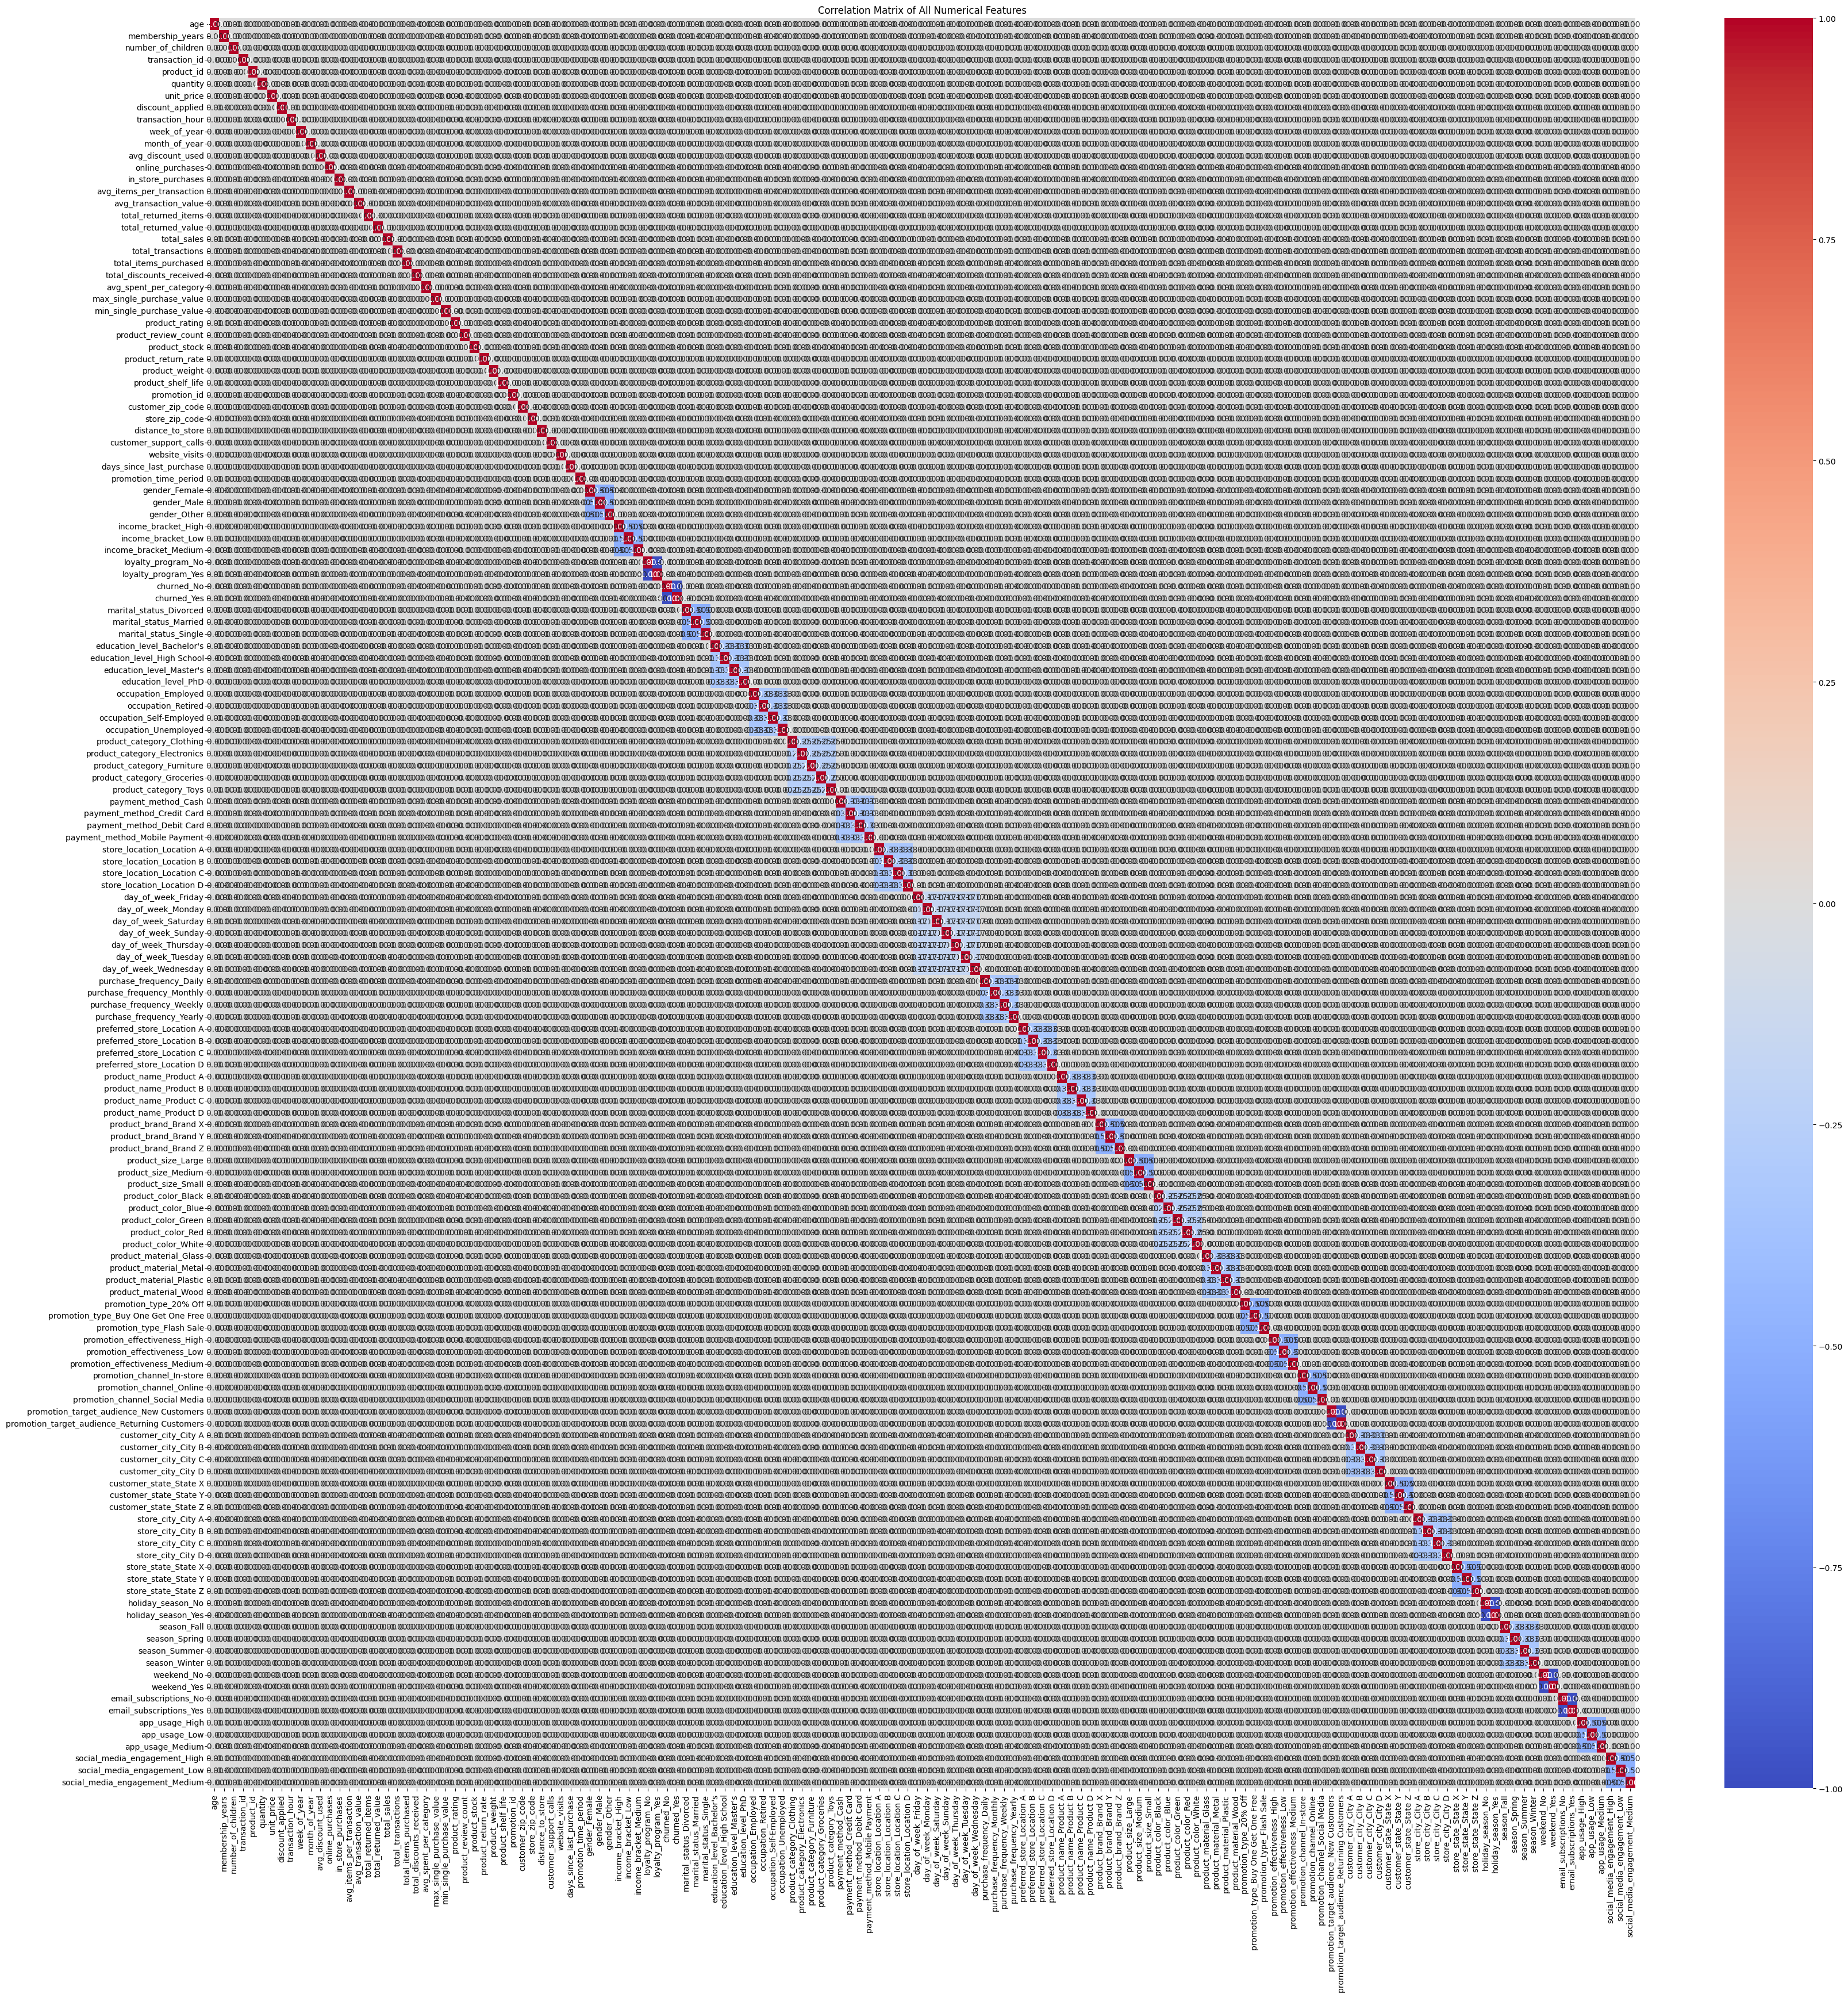

In [42]:
# CORRELATION HEATMAP

import seaborn as sns

# new dataframe just for actual numerical cols
df_subset = df[ogNumericalCols]

# drop the target variable
df_subset = df_subset.drop('avg_purchase_value', axis = 1)

# make a correlation from this new dataframe matrix
correlation_matrix = df_subset.corr()

# visualise matrix using heatmap
plt.figure(figsize=(40, 40)) # dims
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # fmt for string formatting code
plt.title('Correlation Matrix of All Numerical Features')
plt.show()


Interpreting the heatmap:
1. Main diagonal (red) is just the variable's correlation with itself, so ignoring that.
2. Warmer means positive correlation, white means little to no correlation and blue means negative correlation

Thus as most cells are grey/white -> multicollinearity is very low. This is good because the features are mostly independent and the model will not be confused by such correlations. This also means I don't need to drop too many features out of fear that they will correlate too highly with another, thus confusing the model.

3. No features have very strong relationships with one another

In [48]:
# extracting column names
column_names = df.columns.tolist() # for training and considering all vars
column_names_string = "\n".join(column_names)
with open("column_names.txt", "w") as f:
    f.write(column_names_string)


In [50]:
# making a subset dataframe with only the features I want to include in the model training
selected_columns = [
'gender_Male',
'customer_city_City C',
'customer_state_State Z',
'store_state_State Z',
'age',
'membership_years',
'number_of_children',
'transaction_id',
'product_id',
'quantity',
'unit_price',
'discount_applied',
'transaction_hour',
'week_of_year',
'month_of_year',
'avg_purchase_value',
'avg_discount_used',
'online_purchases',
'in_store_purchases',
'avg_items_per_transaction',
'avg_transaction_value',
'total_returned_items',
'total_returned_value',
'total_sales',
'total_transactions',
'total_items_purchased',
'total_discounts_received',
'avg_spent_per_category',
'max_single_purchase_value',
'min_single_purchase_value',
'product_rating',
'product_review_count',
'product_stock',
'product_return_rate',
'product_weight',
'product_shelf_life',
'promotion_id',
'customer_zip_code',
'store_zip_code',
'distance_to_store',
'customer_support_calls',
'website_visits',
'days_since_last_purchase',
'promotion_time_period',
'gender_Female',
'gender_Male',
'gender_Other',
'income_bracket_High',
'income_bracket_Low',
'income_bracket_Medium',
'loyalty_program_No',
'loyalty_program_Yes',
'churned_No',
'churned_Yes',
'marital_status_Divorced',
'marital_status_Married',
'marital_status_Single',
'education_level_Bachelor\'s',
'education_level_High School',
'education_level_Master\'s',
'education_level_PhD',
'occupation_Employed',
'occupation_Retired',
'occupation_Self-Employed',
'occupation_Unemployed',
'product_category_Clothing',
'product_category_Electronics',
'product_category_Furniture',
'product_category_Groceries',
'product_category_Toys',
'payment_method_Cash',
'payment_method_Credit Card',
'payment_method_Debit Card',
'payment_method_Mobile Payment',
'store_location_Location A',
'store_location_Location B',
'store_location_Location C',
'store_location_Location D',
'day_of_week_Friday',
'day_of_week_Monday',
'day_of_week_Saturday',
'day_of_week_Sunday',
'day_of_week_Thursday',
'day_of_week_Tuesday',
'day_of_week_Wednesday',
'purchase_frequency_Daily',
'purchase_frequency_Monthly',
'purchase_frequency_Weekly',
'purchase_frequency_Yearly',
'preferred_store_Location A',
'preferred_store_Location B',
'preferred_store_Location C',
'preferred_store_Location D',
'product_name_Product A',
'product_name_Product B',
'product_name_Product C',
'product_name_Product D',
'product_brand_Brand X',
'product_brand_Brand Y',
'product_brand_Brand Z',
'product_size_Large',
'product_size_Medium',
'product_size_Small',
'product_color_Black',
'product_color_Blue',
'product_color_Green',
'product_color_Red',
'product_color_White',
'product_material_Glass',
'product_material_Metal',
'product_material_Plastic',
'product_material_Wood',
'promotion_type_20% Off',
'promotion_type_Buy One Get One Free',
'promotion_type_Flash Sale',
'promotion_effectiveness_High',
'promotion_effectiveness_Low',
'promotion_effectiveness_Medium',
'promotion_channel_In-store',
'promotion_channel_Online',
'promotion_channel_Social Media',
'promotion_target_audience_New Customers',
'promotion_target_audience_Returning Customers',
'customer_city_City A',
'customer_city_City B',
'customer_city_City C',
'customer_city_City D',
'customer_state_State X',
'customer_state_State Y',
'customer_state_State Z',
'store_city_City A',
'store_city_City B',
'store_city_City C',
'store_city_City D',
'store_state_State X',
'store_state_State Y',
'store_state_State Z',
'holiday_season_No',
'holiday_season_Yes',
'season_Fall',
'season_Spring',
'season_Summer',
'season_Winter',
'weekend_No',
'weekend_Yes',
'email_subscriptions_No',
'email_subscriptions_Yes',
'app_usage_High',
'app_usage_Low',
'app_usage_Medium',
'social_media_engagement_High',
'social_media_engagement_Low',
'social_media_engagement_Medium']

# making a new dataframe out of these columns
df_training = df[selected_columns]

# making the csv out of this new pandas dataframe
df_training.to_csv('training_data.csv', index=False)

In [ ]:
# initially exporting the file as usual
df.to_csv('training_data_1.csv', index=False)

# selected columns only
selected_columns = ['avg_purchase_value', 'customer_city_City C', 'total_returned_items','in_store_purchases','gender_Male','quantity','payment_method_Cash','transaction_id','total_items_purchased','website_visits','customer_zip_code','days_since_last_purchase','product_review_count','store_state_State Z','customer_state_State Z']
df_subset = df[selected_columns]
df_subset.to_csv('training_subset.csv', index=False)